## Crypto bitcoin Forecasting Using FbProphet

####  Install and Import Dependencies

In [28]:
#Google Colab 
# !pip install pystan~=2.14
# !pip install fbprophet
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline



###  Scrap and import the data set from crypto web site

In [43]:
import requests

url = 'https://www.investing.com/crypto/bitcoin/historical-data'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url, headers=header)

dfs = pd.read_html(r.text)

In [44]:
data=dfs[0]

In [45]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 14, 2022",24891.9,24442.1,24896.5,24352.9,152.77K,1.84%
1,"Aug 13, 2022",24442.5,24398.9,24882.9,24318.7,170.59K,0.18%
2,"Aug 12, 2022",24398.7,23935.3,24440.8,23616.4,194.96K,1.94%
3,"Aug 11, 2022",23935.3,23963.3,24873.5,23864.0,285.36K,-0.12%
4,"Aug 10, 2022",23962.9,23150.3,24209.9,22714.7,243.61K,3.53%


In [46]:
data.tail()

,Date,Price,Open,High,Low,Vol.,Change %
27,"Jul 18, 2022",22525.8,20785.6,22714.9,20770.6,279.72K,8.37%
28,"Jul 17, 2022",20785.6,21209.8,21654.4,20755.2,132.81K,-2.00%
29,"Jul 16, 2022",21209.9,20825.2,21561.3,20484.4,136.89K,1.85%
30,"Jul 15, 2022",20825.1,20586.1,21178.1,20393.4,164.67K,1.16%
31,"Jul 14, 2022",20586.0,20250.0,20862.2,19664.9,205.28K,1.66%


In [47]:
# data=data['Data','Change %']
type(data)

pandas.core.frame.DataFrame

In [48]:
data.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

### Drop the unwanted Colunm from data Frame

In [49]:
data.drop(['Price','Open','High', 'Low', 'Vol.'], inplace=True, axis=1)

In [50]:
data.head()

,Date,Change %
0,"Aug 14, 2022",1.84%
1,"Aug 13, 2022",0.18%
2,"Aug 12, 2022",1.94%
3,"Aug 11, 2022",-0.12%
4,"Aug 10, 2022",3.53%


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      32 non-null     object
 1   Change %  32 non-null     object
dtypes: object(2)
memory usage: 640.0+ bytes


### Rename the Colunm name  as Facebook prophet libriry requirments

In [74]:
data.columns = ['ds','y']
data.head()

,ds,y
0,2022-08-14,1.84
1,2022-08-13,0.18
2,2022-08-12,1.94
3,2022-08-11,-0.12
4,2022-08-10,3.53


###Convert The Object colunm into Date

In [75]:
df=data
df['ds'] = pd.to_datetime(df['ds'])

In [76]:
df.head()

,ds,y
0,2022-08-14,1.84
1,2022-08-13,0.18
2,2022-08-12,1.94
3,2022-08-11,-0.12
4,2022-08-10,3.53


### Convert and remove the % sign from Str to float data type

In [77]:
df['y'] = df['y'].str.replace('%', '')
df['y'] = df['y'].astype(float)

In [79]:
# Using plotly.express
import plotly.express as px

# df = px.data.stocks()
fig = px.line(df, x='ds', y="y")
fig.show()

### import the fbprophet library

In [80]:

from fbprophet import Prophet

In [81]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

### Initialize the Model

In [145]:
model=Prophet()

In [83]:
df.columns


Index(['ds', 'y'], dtype='object')

### Train Model

In [84]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


In [85]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [86]:
df.tail()


,ds,y
27,2022-07-18,8.37
28,2022-07-17,-2.00
29,2022-07-16,1.85
30,2022-07-15,1.16
31,2022-07-14,1.66


### Forecast Away for 10 days

In [92]:
### Create future dates of 10 days
future_dates=model.make_future_dataframe(periods=10)

In [146]:
future_dates.tail()

,ds
37,2022-08-20
38,2022-08-21
39,2022-08-22
40,2022-08-23
41,2022-08-24


### Predication of Next 10 days

In [94]:
prediction=model.predict(future_dates)


In [95]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-07-14,1.029579,-2.071690,4.493386,1.029579,1.029579,0.084564,0.084564,0.084564,0.084564,0.084564,0.084564,0.0,0.0,0.0,1.114143
1,2022-07-15,1.010642,-2.677375,4.339104,1.010642,1.010642,0.015627,0.015627,0.015627,0.015627,0.015627,0.015627,0.0,0.0,0.0,1.026269
2,2022-07-16,0.991705,-3.250282,3.470315,0.991705,0.991705,-0.939492,-0.939492,-0.939492,-0.939492,-0.939492,-0.939492,0.0,0.0,0.0,0.052213
3,2022-07-17,0.972768,-3.135336,3.395718,0.972768,0.972768,-0.708345,-0.708345,-0.708345,-0.708345,-0.708345,-0.708345,0.0,0.0,0.0,0.264423
4,2022-07-18,0.953831,-1.866084,5.049943,0.953831,0.953831,0.578463,0.578463,0.578463,0.578463,0.578463,0.578463,0.0,0.0,0.0,1.532294


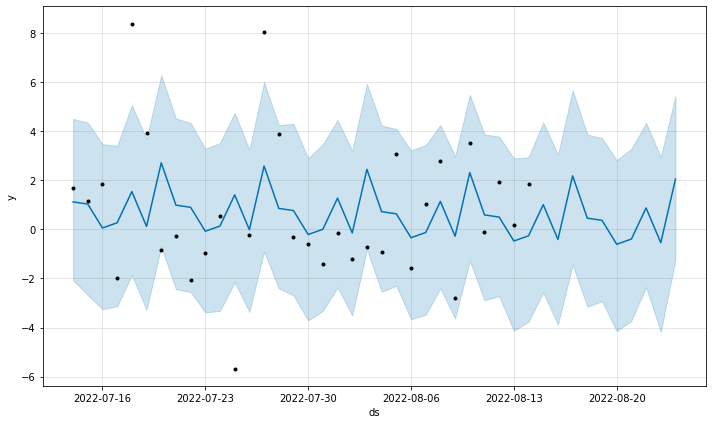

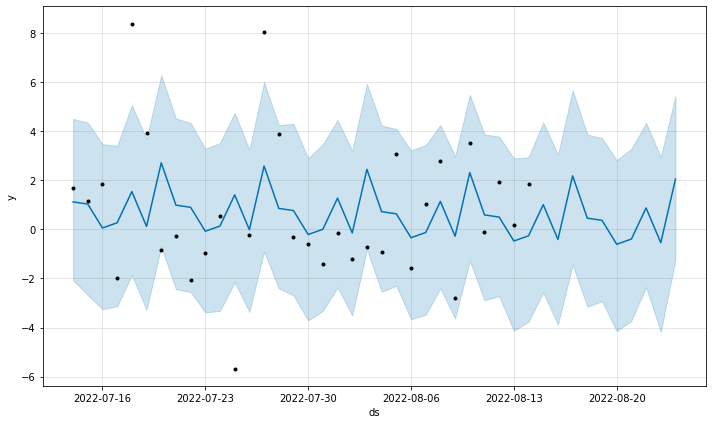

In [96]:
### plot the predicted projection
model.plot(prediction)

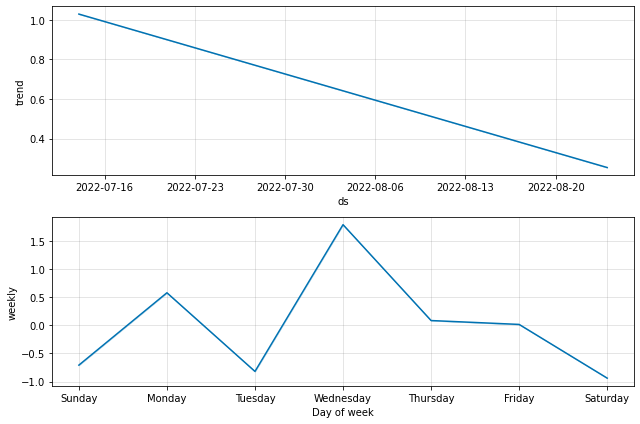

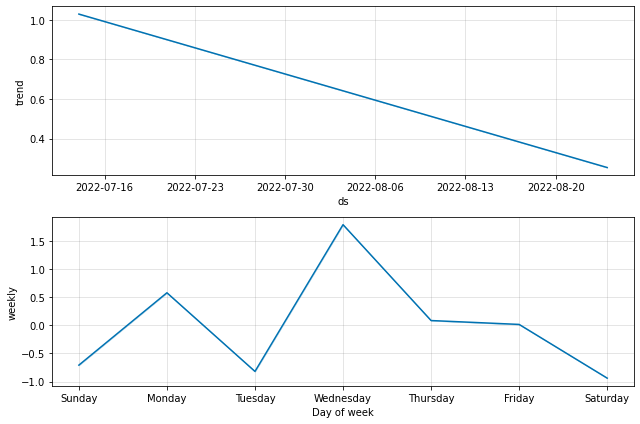

In [98]:
#### Visualize Each Components[Trends,Weekly]
model.plot_components(prediction)

### Cross validation

In [110]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='30 days', period='7 days', horizon = '4 days')
df_cv.head()

In [134]:
# cutoffs = pd.to_datetime(['2022-08-14', '2022-07-25', '2022-07-14'])
# df_cv2 = cross_validation(model, cutoffs=cutoffs, horizon='29 days')

In [139]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='0 days', period='20 days', horizon = '30 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2022-07-15 00:00:00 and 2022-07-15 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 0.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-07-16,10.565248,10.565248,10.565248,1.85,2022-07-15
1,2022-07-17,5.010499,5.010498,5.010499,-2.00,2022-07-15
2,2022-07-18,-15.264974,-15.264974,-15.264974,8.37,2022-07-15
3,2022-07-19,0.592215,0.592215,0.592215,3.93,2022-07-15
4,2022-07-20,-1.791166,-1.791167,-1.791166,-0.83,2022-07-15


In [140]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-07-16,10.565248,10.565248,10.565248,1.85,2022-07-15
1,2022-07-17,5.010499,5.010498,5.010499,-2.00,2022-07-15
2,2022-07-18,-15.264974,-15.264974,-15.264974,8.37,2022-07-15
3,2022-07-19,0.592215,0.592215,0.592215,3.93,2022-07-15
4,2022-07-20,-1.791166,-1.791167,-1.791166,-0.83,2022-07-15
5,2022-07-21,3.507419,3.507419,3.507419,-0.27,2022-07-15
6,2022-07-22,3.007419,3.007419,3.007419,-2.06,2022-07-15
7,2022-07-23,12.412667,12.412666,12.412667,-0.95,2022-07-15
8,2022-07-24,6.857918,6.857917,6.857918,0.54,2022-07-15
9,2022-07-25,-13.417555,-13.417556,-13.417555,-5.67,2022-07-15


In [141]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,227.904882,15.096519,13.120240,3.679989,3.505249,0.0
1,4 days,206.299971,14.363146,11.327753,2.392777,2.823772,0.0
2,5 days,190.225555,13.792228,9.311309,1.610371,1.158032,0.0
3,6 days,8.777848,2.962743,2.692124,5.332594,1.158032,0.0
4,7 days,13.623824,3.691046,3.268668,5.869462,2.459912,0.0


In [142]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,227.904882,15.096519,13.120240,3.679989,3.505249,0.0
1,4 days,206.299971,14.363146,11.327753,2.392777,2.823772,0.0
2,5 days,190.225555,13.792228,9.311309,1.610371,1.158032,0.0
3,6 days,8.777848,2.962743,2.692124,5.332594,1.158032,0.0
4,7 days,13.623824,3.691046,3.268668,5.869462,2.459912,0.0


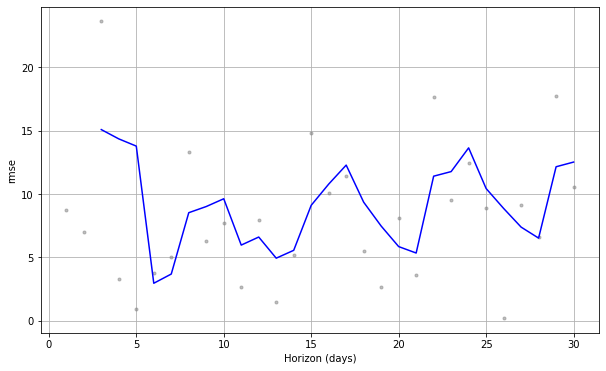

In [143]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')